In [1]:
# Import libraries
import pandas as pd
from app import db, DTSchool
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\flask_sqlalchemy\__init__.py:872: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  warnings.warn(FSADeprecationWarning(


In [2]:
le = preprocessing.LabelEncoder()

# Execute a query and store the results in a DataFrame
school_data = pd.read_sql_query(db.session.query(DTSchool).statement, db.session.bind)
for column_name in school_data.columns:
    if school_data[column_name].dtype == object:
        school_data[column_name] = le.fit_transform(school_data[column_name])
    else:
        pass
# school_data.dtypes

In [3]:
X = school_data.drop(columns=['School', 'id'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.9

In [75]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [77]:
# check feature importance
print(dt_model.feature_importances_)

[0.        0.2296385 0.7703615]


In [78]:
accuracy_score(y_test, predictions)

1.0

In [79]:
confusion_matrix(y_test, predictions)

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



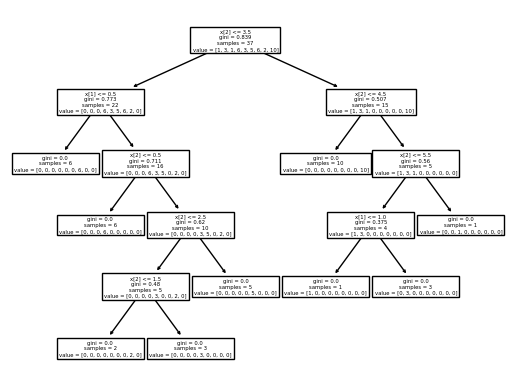

In [81]:
tree.plot_tree(dt_model)
tree.export_graphviz(dt_model, out_file='dt_plot.dot',
                     feature_names=X.columns,
                     class_names=le.classes_,
                     filled=True,
                     rounded=True,
                     label='all')

In [4]:
school_data

,id,Course,Tuition_Fee,Location,School
0,1,1,0,5,0
1,2,1,2,5,1
2,3,0,2,5,1
3,4,10,2,5,1
4,5,9,2,5,1
5,6,8,2,5,1
6,7,1,3,6,2
7,8,0,3,6,2
8,9,10,3,6,2
9,10,1,2,0,3


In [5]:
course = input("Enter the course name: ")
tuition_fee = input("Enter the tuition fee: ")
location = input("Enter the location: ")


# Create a mapping dictionary that maps each possible course value to its corresponding index
course_mapping = {
    'Bachelor of Elementary Education': 0,
    'Bachelor of Science in Accountancy': 1,
    'Bachelor of Science in Architecture': 2,
    'Bachelor of Science in Civil Engineering': 3,
    'Bachelor of Science in Criminology': 4,
    'Bachelor of Science in Electrical Engineering': 5,
    'Bachelor of Science in Electronics Engineering': 6,
    'Bachelor of Science in Mechanical Engineering': 7,
    'Bachelor of Science in Nursing': 8,
    'Bachelor of Science in Psychology': 9,
    'Bachelor of Secondary Education': 10,
    'Bachelor of Secondary Education Major in English': 11,
    'Bachelor of Secondary Education Major in Filipino': 12,
    'Bachelor of Secondary Education Major in Mathematics': 13,
    'Bachelor of Secondary Education Major in Social Studies': 14
    # Add other possible course values and their indices here
}
tuition_mapping = {
    '0 - 20000': 0,
    '21000 - 40000': 1,
    '41000 - 60000': 2,
    'Free Tuition': 3,
    # Add other possible location values and their indices here
}

# Create a mapping dictionary that maps each possible location value to its corresponding index
location_mapping = {
    'Brgy. Bucal': 0,
    'Brgy. Halang': 1,
    'Brgy. III': 2,
    'Brgy. Makiling': 3,
    'Brgy. Paciano Rizal': 4,
    'Brgy. Parian': 5,
    'Brgy. VII': 6,
    # Add other possible location values and their indices here
}

encoded_input_values = [
    course_mapping[course],
    tuition_mapping[tuition_fee],
    location_mapping[location]
]
#


# Make predictions on test data using the predict_proba method
probabilities = dt_model.predict_proba([encoded_input_values])
schools_offering_course = DTSchool.query.filter_by(Course=course).all()

# Get schools for each data point
schools = np.argsort(-probabilities, axis=1)[:, :9]

# Flatten the array
schools_flat = schools.flatten()


# Convert the integer labels back into the original string labels
recommended_schools = le.inverse_transform(schools_flat).tolist()

print(recommended_schools)

,id,Course,Tuition_Fee,Location,School
0,1,Bachelor of Science in Accountancy,0 - 20000,Barangay Parian,AMA Computer College
1,2,Bachelor of Science in Accountancy,41000 - 60000,Barangay Parian,Calamba Doctor's College
2,3,Bachelor of Elementary Education,41000 - 60000,Barangay Parian,Calamba Doctor's College
3,4,Bachelor of Secondary Education,41000 - 60000,Barangay Parian,Calamba Doctor's College
4,5,Bachelor of Science in Psychology,41000 - 60000,Barangay Parian,Calamba Doctor's College
5,6,Bachelor of Science in Nursing,41000 - 60000,Barangay Parian,Calamba Doctor's College
6,7,Bachelor of Science in Accountancy,Free Tuition,Barangay VII,City College of Calamba
7,8,Bachelor of Elementary Education,Free Tuition,Barangay VII,City College of Calamba
8,9,Bachelor of Secondary Education,Free Tuition,Barangay VII,City College of Calamba
9,10,Bachelor of Science in Accountancy,41000 - 60000,Barangay Bucal,Colegio de San Juan de Letran


In [6]:
# Execute a query and store the results in a DataFrame
school_data = pd.read_sql_query(db.session.query(DTSchool).filter_by(Course=course).statement, db.session.bind)

for column_name in school_data.columns:
    if school_data[column_name].dtype == object:
        school_data[column_name] = le.fit_transform(school_data[column_name])
    else:
        pass

X = school_data.drop(columns=['School', 'id'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
school_data

['Colegio de San Juan de Letran', 'AMA Computer College', "Calamba Doctor's College", 'City College of Calamba', 'Laguna College Of Business And Arts', 'Lyceum of the Philippines University', 'Saint John Colleges', 'Saints John and Paul Colleges']


C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
course = input("Enter the course name: ")
tuition_fee = input("Enter the tuition fee: ")
location = input("Enter the location: ")


# Create a mapping dictionary that maps each possible course value to its corresponding index
course_mapping = {
    'Bachelor of Elementary Education': 0,
    'Bachelor of Science in Accountancy': 0,
    'Bachelor of Science in Architecture': 0,
    'Bachelor of Science in Civil Engineering': 0,
    'Bachelor of Science in Criminology': 0,
    'Bachelor of Science in Electrical Engineering': 0,
    'Bachelor of Science in Electronics Engineering': 0,
    'Bachelor of Science in Mechanical Engineering': 0,
    'Bachelor of Science in Nursing': 0,
    'Bachelor of Science in Psychology': 0,
    'Bachelor of Secondary Education': 0,
    'Bachelor of Secondary Education Major in English': 0,
    'Bachelor of Secondary Education Major in Filipino': 0,
    'Bachelor of Secondary Education Major in Mathematics': 0,
    'Bachelor of Secondary Education Major in Social Studies': 0
    # Add other possible course values and their indices here
}
# Create a mapping dictionary that maps each possible location value to its corresponding index
location_mapping = {
    'Brgy. Bucal': 0,
    'Brgy. Halang': 1,
    'Brgy. III': 2,
    'Brgy. Makiling': 3,
    'Brgy. Paciano Rizal': 4,
    'Brgy. Parian': 5,
    'Brgy. VII': 6,
    # Add other possible location values and their indices here
}

encoded_input_values = [
    # course_mapping[course],
    tuition_fee,
    location_mapping[location]
]
# Execute a query and store the results in a DataFrame
school_data = pd.read_sql_query(db.session.query(DTSchool).filter_by(Course=course).statement, db.session.bind)

for column_name in school_data.columns:
    if school_data[column_name].dtype == object:
        school_data[column_name] = le.fit_transform(school_data[column_name])
    else:
        pass

X = school_data.drop(columns=['School', 'id', 'Course'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


# Make predictions on test data using the predict_proba method
probabilities = dt_model.predict_proba([encoded_input_values])
schools_offering_course = DTSchool.query.filter_by(Course=course).all()

# Get schools for each data point
schools = np.argsort(-probabilities, axis=1)[:, :9]

# Flatten the array
schools_flat = schools.flatten()


# Convert the integer labels back into the original string labels
recommended_schools = le.inverse_transform(schools_flat).tolist()

print(recommended_schools)

['Saint John Colleges', 'AMA Computer College', "Calamba Doctor's College", 'City College of Calamba', 'Colegio de San Juan de Letran', 'Laguna College Of Business And Arts', 'Lyceum of the Philippines University', 'University of Perpetual Help System Dalta']


C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
# check feature importance
print(dt_model.feature_importances_)

['City College of Calamba', 'AMA Computer College', "Calamba Doctor's College", 'Colegio de San Juan de Letran', 'Laguna College Of Business And Arts', 'Lyceum of the Philippines University']


C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [41]:
school_data

,id,Course,Tuition_Fee,Location,School
0,1,0,47000.0,4,1
1,6,0,22000.0,4,0
2,9,0,41000.0,2,5
3,10,0,42000.0,2,5
4,11,0,43000.0,2,5
5,25,0,18000.0,1,6
6,26,0,22000.0,1,6
7,27,0,16000.0,1,6
8,28,0,17000.0,1,6
9,53,0,20000.0,1,4


In [42]:
# Execute a query and store the results in a DataFrame
school_data = pd.read_sql_query(db.session.query(DTSchool).filter_by(Course=course).statement, db.session.bind)
school_data

,id,Course,Tuition_Fee,Location,School
0,1,Bachelor of Science in Accountancy,47000.0,Brgy. Parian,Calamba Doctor's College
1,6,Bachelor of Science in Accountancy,22000.0,Brgy. Parian,AMA Computer College
2,9,Bachelor of Science in Accountancy,41000.0,Brgy. Makiling,Lyceum of the Philippines University
3,10,Bachelor of Science in Accountancy,42000.0,Brgy. Makiling,Lyceum of the Philippines University
4,11,Bachelor of Science in Accountancy,43000.0,Brgy. Makiling,Lyceum of the Philippines University
5,25,Bachelor of Science in Accountancy,18000.0,Brgy. III,Saint John Colleges
6,26,Bachelor of Science in Accountancy,22000.0,Brgy. III,Saint John Colleges
7,27,Bachelor of Science in Accountancy,16000.0,Brgy. III,Saint John Colleges
8,28,Bachelor of Science in Accountancy,17000.0,Brgy. III,Saint John Colleges
9,53,Bachelor of Science in Accountancy,20000.0,Brgy. III,Laguna College Of Business And Arts


In [51]:
accuracy_score(y_test, predictions)

0.1